**Chapter3 Unsupervised and Data Preprocessing**

**3.4 Dimensionality Reduction**

**3.4.1 Principal Component Analysis**

주성분 분석은, 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전하는 것.

회전한 뒤에, 데이터를 설명하는데 얼마나 중요하냐에 따라서, 종종 새로운 특성 중 일부만 선택

In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


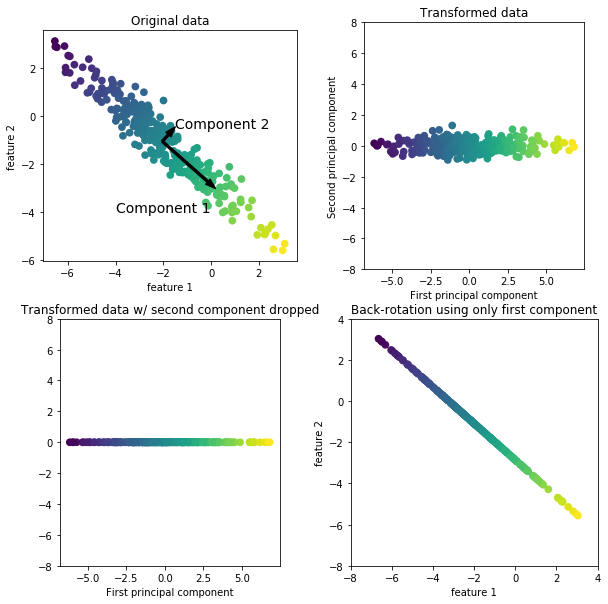

In [2]:
mglearn.plots.plot_pca_illustration()

1. 첫번째 그래프는, 원본 데이터 포인트를 색으로 표시한 것. 이 알고리즘은 Component1이라고 쓰여있는, 분산이 가장 큰 방향을 찾는다. 이 방향(벡터)이 데이터에서, 가장 많은 정보를 담고 있는 방향.
2. 곧 특성들의 상관관계가 가증 큰 방향이다.
3. 다음으로, 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다. 2차원에서는 가능한 직각 방향이 하나뿐이지만 고차원에서는 수많은 직각 방향이 있을 수 있다. 
4. 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서, **주성분(principal component)** 라고 한다. 일반적으로 원본 특성 개수만큼의 주성분이 있다.
5. 오른쪽 위 그래프는 같은 데이터이지만 주성분 1과 2를 각각 x축과 y축에 나란히 하도록 회전한 것. **회전하기 전, 데이터에서 평균을 빼서, 중심을 원점에 맞춤**
6. **PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변한된 데이터의 상관관계 행렬이, 대각선 방향을 제외하고는 0이 된다.**
7. PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다. 이 예에서는, 세번째 그래프처럼 첫번째 주성분만 유지하려고 한다. 
8. 이 예에서는, 아래 왼쪽과 같이, 첫번째 주성분만 유지하려고 한다. 이렇게 하면 2차원 데이터셋이 1차원으로 감소한다. 그러나 원본 특성 중 하나만 남기는, 단순한 그런 것은 아니다.
9. 가장 유용한 방향을 찾아서, 그 방향의 성분, **즉 첫 번째 주성분을 유지한다는 것**
10. 마지막으로 데이터에 다시 평균을 더해서 반대로 회전. 이 결과과 아래 오른쪽 그래프. 이 데이터 포인트는 원래 특성 공간에 놓여 있지만, 첫번째 주성분의 정보만 담는다. 이 변환은 데이터에서 노이즈를 제거하거나, 주성분에서 유지되는 정보를 시각화하는데 종종 사용

**PCA적용하여, 유방함 데이터셋 시각화하기**

유방암 데이터는 iris 데이터와 달리, 산점도 행렬로 표현하기 힘들다. 고차원이기 때문. (30개의 특성)

이 데이터셋은, 특성을 30개나 가지고 있어서 30*****14 = 420개의 산점도를 그려야 한다. 이보다 쉬운 방법은 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는 것.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

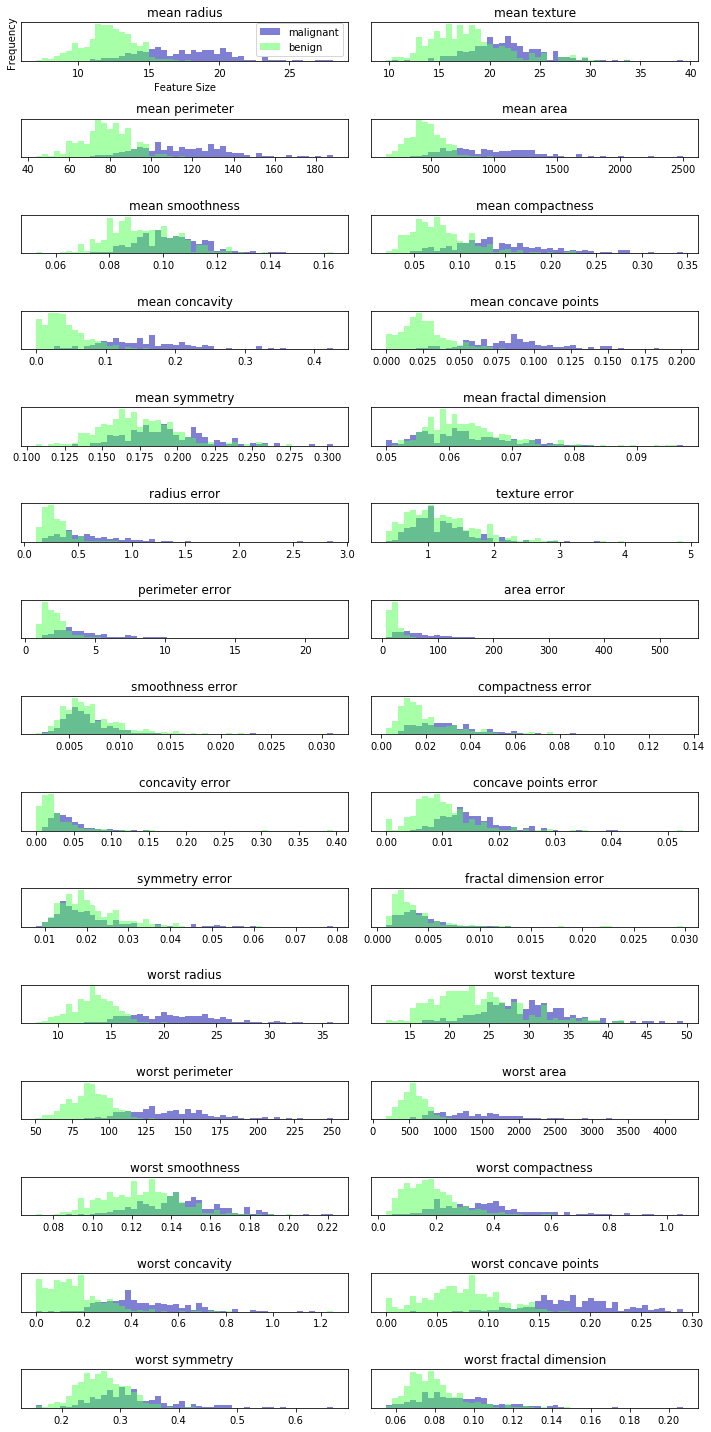

In [6]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature Size")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc='best')
fig.tight_layout()

위의 그래프는, 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알 수 없다.

PCA를 사용하면, 주요 상호작용을 찾아낼 수 있어 더 나은 시각화를 할 수 있다.

처음 2개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시각화하면 아래와 같다.

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [8]:
from sklearn.preprocessing import *

In [9]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

위는, PCA를 적용하기 전, SS를 사용하여 각 특성이 분산이 1이 되도록 데이터의 스케일을 조정하였다.

**특성의 스케일이 서로 다르면, 올바른 주성분 방향을 찾을 수 없으니, PCA를 사용할때는 표준값으로 바꿔줘야 한다.**

PCA변환은, PCA객체를 생성하고, fit method를 호출하여 주성분을 찾는다. 그리고 transform method를 호출하여, 데이터를 회전시키고 차원을 축소한다.

PCA는 특잇값 분해(SVD)방식을 사용하여 주성분을 찾는다. 먼저 fit method에서 Scipy의 linalg.svd 함수를 이용하여 U, s, V 배열을 구한다. 그런다음 transform 메서드를 입력 데이터와 주성분 V 행렬의

전치행렬을 곱하여, 변환된 데이터를 구한다. 그런데 이 값은 U와 s를 곱해서도 구할 수 있다. fit_transform method에서는 U와 s를 사용해, 변환된 데이터를 계산하며 차원이 많은 데이터에서 몇 개의 주성분만 고를 경우

성능이 조금 더 낫다.


In [12]:
from sklearn.decomposition import PCA

# 데이터의 처음 2개의 주성분만 유지.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델 생성
pca.fit(X_scaled)

# 처음 2개의 주성분을 사용하여 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 {}".format(str(x_pca.shape)))

원본 데이터 형태 (569, 30)
축소된 데이터 형태 (569, 2)


Text(0, 0.5, '2 Component')

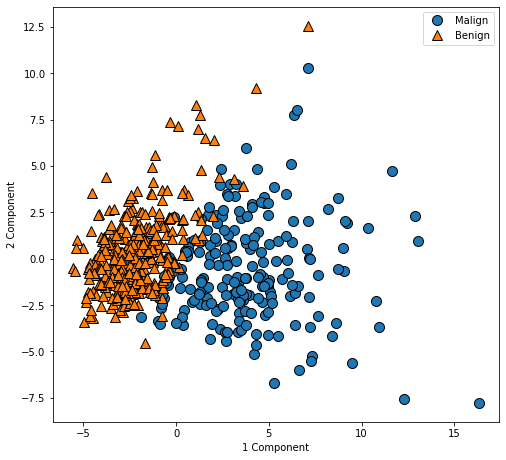

In [13]:
# 클래스를 색으로 구분하여, 처음 2개의 주성분을 그래프로 나타냄.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["Malign", "Benign"], loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("1 Component")
plt.ylabel("2 Component")

**PCA는 비지도 학습으로, 회전축을 찾을 때, 어떤 클래스 정보도 이용하지 않는다. 단순히 데이터의 상관관계만을 고려.**

위와 같이 나눌 수 있다면, 2차원 공간에서 직선 하나를 학습하는 선형 분류기로도 두 클래스를 잘 구분할 수 있다. 또한 악성 포인트가 양성 포인트보다 더 넓게 퍼져있는 것을 볼 수 있으며 앞서 그려본 히스토그램으로도

살짝 엿볼 수 있다.

PCA단점은, 두 크래프의 두 축을 해석하시 어렵다는 것. 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태. PCA가 객체를 학습될 때, (fit method) components_속성에, 주성분이 저장된다.

In [14]:
print("PCA principal Component Shape : {}".format(pca.components_.shape))

PCA principal Component Shape : (2, 30)


components_의 각 행은, 주성분 하나씩을 나타내며 중요도에 따라 정렬되는 것. 열은 원본 데이터의 특성에 대응하는 값. 이 예에서는 mean radius, mean texture 등이다. 

In [15]:
print("PCA principal :\n {}".format(pca.components_))

PCA principal :
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal')

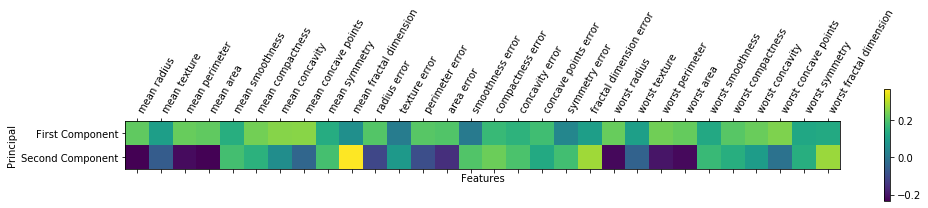

In [17]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First Component", "Second Component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), 
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Principal")

첫 번째 주성분은 모든 특성의 부호가 같다. (모두 양수이나, 앞서 언급한것처럼 주성분의 방향은 의미가 없다.) 즉 모든 특성 사이에 공통의 상호관계가 있다는 뜻. 따라서 한 특성의 값이 커지면 다른 값들도 같이 커짐.

두 번째 주성분은 부호가 섞여 있고, 두 주 성분 모두 30개의 특성이 있다. 모든 특성이 섞여 있으므로, 축이 가지는 의미를 설명하기가 어렵다.